In [2]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
import pandas as pd
# from pandarallel import pandarallel
from tqdm import tqdm
import datamol as dm

# pandarallel.initialize(progress_bar=True, nb_workers=6)

## Our work

In [3]:
# def diazole_transfer(NH2_smi):
#     mol = Chem.MolFromSmiles(NH2_smi)
#     if mol is None:
#         raise ValueError('Invalid molecule')
#     primary_aliphatic_amine_pattern = Chem.MolFromSmarts('[N;X3;H2][C;!$(C=[O,N,S])]')
#     if mol.HasSubstructMatch(primary_aliphatic_amine_pattern):
#         rxn_smarts = '[N;X3;H2:2][C;!$(C=[O,N,S]):1].[N:3]=[N:4]>>[C;!$(C=[O,N,S]):1][N:2]=[N+:3]=[-N:4]'
#         rxn = AllChem.ReactionFromSmarts(rxn_smarts)
#         # rxn.Initialize()
#         products = rxn.RunReactants((mol, Chem.MolFromSmiles('N=N')))
#         # print(Chem.MolToSmiles(products[0]))
#         return Chem.MolToSmiles(products[0][0])

# def modular_click(NH2_smi, ace_smi):
#     azide_smi = diazole_transfer(NH2_smi)
    # azide = Chem.MolFromSmiles(azide_smi)
    # alkyne = Chem.MolFromSmiles(ace_smi)
    # reaction = CuAAC(alkyne, azide)
    # product = reaction.get_product()
    # return Chem.MolToSmiles(product)

In [4]:
def ugi_4c_3c_oxo_acid_rxn(amine_smi:str, oxo_acid_smi:str, nc_smi:str, return_mol:bool=False):

    amine_mol = Chem.MolFromSmiles(amine_smi)
    oxo_acid_mol = Chem.MolFromSmiles(oxo_acid_smi)
    nc_mol = Chem.MolFromSmiles(nc_smi)

    keto_acid_7r_pattern = Chem.MolFromSmarts("[#6]C(=O)[#6]~*~*~[#6]C(=O)(-[OH])")
    alde_acid_7r_pattern = Chem.MolFromSmarts("[C;H1](=O)[#6]~*~*~[#6]C(=O)(-[OH])")
    keto_acid_6r_pattern = Chem.MolFromSmarts("[#6]C(=O)[#6]~*~[#6]C(=O)(-[OH])")
    alde_acid_6r_pattern = Chem.MolFromSmarts("[C;H1](=O)[#6]~*~[#6]C(=O)(-[OH])")
    keto_acid_5r_pattern = Chem.MolFromSmarts("[#6]C(=O)[#6]~[#6]C(=O)(-[OH])")
    alde_acid_5r_pattern = Chem.MolFromSmarts("[C;H1](=O)[#6]~[#6]C(=O)(-[OH])")
    keto_acid_4r_pattern = Chem.MolFromSmarts("[#6]C(=O)[#6]C(=O)")
    alde_acid_4r_pattern = Chem.MolFromSmarts("[C;H1](=O)[#6]C(=O)(-[OH])")

    if oxo_acid_mol.HasSubstructMatch(keto_acid_7r_pattern):
            
        ugi_4c_3c_7r_keto_smarts = "[N;X3;H2:1][#6;!$(C=[C,O,N,S]);!$(C#*):2].[#6:3][C:4](=O)[#6:5]~[*:6]~[*:7]~[#6:8][C:9](=[O:10])(-[O:11]).[C-:12]#[N+:13]>> \
        [O:10]=[C:9]1[N:1]([C:2])[C:4]([C+0:12]([N+0:13])=[O:11])([C:3])[#6:5]~[*:6]~[*:7]~[#6:8]1"

        ugi_4c_3c_7r_keto_rxn = AllChem.ReactionFromSmarts(ugi_4c_3c_7r_keto_smarts)

        products = ugi_4c_3c_7r_keto_rxn.RunReactants((amine_mol, oxo_acid_mol, nc_mol))
        
    elif oxo_acid_mol.HasSubstructMatch(keto_acid_6r_pattern):

        ugi_4c_3c_6r_keto_smarts = "[N;X3;H2:1][#6;!$(C=[C,O,N,S]);!$(C#*):2].[#6:3][C:4](=O)[#6:5]~[*:6]~[#6:7][C:8](=[O:9])(-[O:10]).[C-:11]#[N+:12]>> \
        [O:9]=[C:8]1[N:1]([C:2])[C:4]([C+0:11]([N+0:12])=[O:10])([C:3])[#6:5]~[*:6]~[#6:7]1"

        ugi_4c_3c_6r_keto_rxn = AllChem.ReactionFromSmarts(ugi_4c_3c_6r_keto_smarts)

        products = ugi_4c_3c_6r_keto_rxn.RunReactants((amine_mol, oxo_acid_mol, nc_mol))

    
    elif oxo_acid_mol.HasSubstructMatch(keto_acid_5r_pattern):

        ugi_4c_3c_5r_keto_smarts = "[N;X3;H2:1][#6;!$(C=[C,O,N,S]);!$(C#*):2].[#6:3][C:4](=O)[#6:5]~[#6:6][C:7](=[O:8])(-[O:9]).[C-:10]#[N+:11]>> \
        [O:8]=[C:7]1[N:1]([C:2])[C:4]([C+0:10]([N+0:11])=[O:9])([C:3])[#6:5]~[#6:6]1"

        ugi_4c_3c_5r_keto_rxn = AllChem.ReactionFromSmarts(ugi_4c_3c_5r_keto_smarts)

        products = ugi_4c_3c_5r_keto_rxn.RunReactants((amine_mol, oxo_acid_mol, nc_mol))
    
    elif oxo_acid_mol.HasSubstructMatch(keto_acid_4r_pattern):
            
        ugi_4c_3c_4r_keto_smarts = "[N;X3;H2:1][#6;!$(C=[C,O,N,S]);!$(C#*):2].[#6:3][C:4](=O)[#6:5][C:6](=[O:7])(-[O:8]).[C-:9]#[N+:10]>> \
        [O:7]=[C:6]1[N:1]([C:2])[C:4]([C+0:9]([N+0:10])=[O:8])([C:3])[#6:5]1"

        ugi_4c_3c_4r_keto_rxn = AllChem.ReactionFromSmarts(ugi_4c_3c_4r_keto_smarts)

        products = ugi_4c_3c_4r_keto_rxn.RunReactants((amine_mol, oxo_acid_mol, nc_mol))

    elif oxo_acid_mol.HasSubstructMatch(alde_acid_7r_pattern):

        ugi_4c_3c_6r_alde_smarts = "[N;X3;H2:1][#6;!$(C=[C,O,N,S]);!$(C#*):2].[C;H1:3](=O)[#6:4]~[*:5]~[*:6]~[#6:7][C:8](=[O:9])(-[O:10]).[C-:11]#[N+:12]>> \
        [O:9]=[C:7]1[N:1]([C:2])[C:3]([C+0:11]([N+0:12])=[O:10])[#6:4]~[*:5]~[*:6]~[#6:8]1"

        ugi_4c_3c_6r_alde_rxn = AllChem.ReactionFromSmarts(ugi_4c_3c_6r_alde_smarts)

        products = ugi_4c_3c_6r_alde_rxn.RunReactants((amine_mol, oxo_acid_mol, nc_mol))

    elif oxo_acid_mol.HasSubstructMatch(alde_acid_6r_pattern):


        ugi_4c_3c_6r_alde_smarts = "[N;X3;H2:1][#6;!$(C=[C,O,N,S]);!$(C#*):2].[C;H1:3](=O)[#6:4]~[*:5]~[#6:6][C:7](=[O:8])(-[O:9]).[C-:10]#[N+:11]>> \
        [O:8]=[C:7]1[N:1]([C:2])[C:3]([C+0:10]([N+0:11])=[O:9])[#6:4]~[*:5]~[#6:6]1"

        ugi_4c_3c_6r_alde_rxn = AllChem.ReactionFromSmarts(ugi_4c_3c_6r_alde_smarts)

        products = ugi_4c_3c_6r_alde_rxn.RunReactants((amine_mol, oxo_acid_mol, nc_mol))


    elif oxo_acid_mol.HasSubstructMatch(alde_acid_5r_pattern):


        ugi_4c_3c_5r_alde_smarts = "[N;X3;H2:1][#6;!$(C=[C,O,N,S]);!$(C#*):2].[C;H1:3](=O)[#6:4][#6:5][C:6](=[O:7])(-[O:8]).[C-:9]#[N+:10]>> \
        [O:7]=[C:6]1[N:1]([C:2])[C:3]([C+0:9]([N+0:10])=[O:8])[#6:4]~[#6:5]1"

        ugi_4c_3c_5r_alde_rxn = AllChem.ReactionFromSmarts(ugi_4c_3c_5r_alde_smarts)

        products = ugi_4c_3c_5r_alde_rxn.RunReactants((amine_mol, oxo_acid_mol, nc_mol))

    elif oxo_acid_mol.HasSubstructMatch(alde_acid_4r_pattern):

        ugi_4c_3c_4r_alde_smarts = "[N;X3;H2:1][#6;!$(C=[C,O,N,S]);!$(C#*):2].[C;H1:3](=O)[#6:4][C:5](=[O:6])(-[O:7]).[C-:8]#[N+:9]>> \
        [O:6]=[C:6]1[N:1]([C:2])[C:3]([C+0:8]([N+0:9])=[O:7])[#6:4]~[#6:5]1"

        ugi_4c_3c_4r_alde_rxn = AllChem.ReactionFromSmarts(ugi_4c_3c_4r_alde_smarts)

        products = ugi_4c_3c_4r_alde_rxn.RunReactants((amine_mol, oxo_acid_mol, nc_mol))

    # try:
    # if return_mol:
    #     return products[0][0]
    # else:
    #     return Chem.MolToSmiles(products[0][0], kekuleSmiles=True, canonical=True)
    # except:
        # print(Chem.MolToSmiles(products[0][0]))
    return products[0][0]
    

def kekulize_smiles(orig_smiles, useIsomericSmiles=True, workers=1):
    """
    Generate Kekulized SMILES strings for the molecules specified by orig_smiles. Kekulized SMILES strings
    are ones in which aromatic rings are represented by uppercase letters with alternating single and
    double bonds, rather than lowercase letters; they are needed by some external applications.

    Args:
        orig_smiles (list or str): List of SMILES strings to Kekulize.

        useIsomericSmiles (bool): Whether to retain stereochemistry information in the generated strings.

        workers (int): Number of parallel threads to use for calculation.

    Returns:
        list or str: Kekulized SMILES strings.

    """

    if isinstance(orig_smiles, list):
        from functools import partial
        func = partial(kekulize_smiles, useIsomericSmiles=useIsomericSmiles)
        if workers > 1:
            from multiprocessing import pool
            batchsize = 200
            batches = [orig_smiles[i:i + batchsize] for i in range(0, len(orig_smiles), batchsize)]
            with pool.Pool(workers) as p:
                kekulized_smiles = p.map(func, batches)
                kekulized_smiles = [y for x in kekulized_smiles for y in x]  # Flatten results
        else:
            kekulized_smiles = [func(smi) for smi in orig_smiles]
    else:
        std_mol = Chem.MolFromSmiles(orig_smiles)
        if std_mol is None:
            kekulized_smiles = ""
        else:
            Chem.Kekulize(std_mol)
            kekulized_smiles = Chem.MolToSmiles(std_mol, kekuleSmiles=True, isomericSmiles=useIsomericSmiles)
    return kekulized_smiles


True


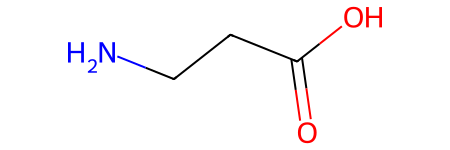

In [5]:
keto_acid_6r_pattern = Chem.MolFromSmarts("[#6]C(=O)[#6]*[#6]C(=O)(-[OH])")
alde_acid_6r_pattern = Chem.MolFromSmarts("[C;H1](=O)[#6]*[#6]C(=O)(-[OH])")
keto_acid_5r_pattern = Chem.MolFromSmarts("[#6]C(=O)[#6][#6]C(=O)(-[OH])")
alde_acid_5r_pattern = Chem.MolFromSmarts("[C;H1](=O)[#6][#6]C(=O)(-[OH])")
keto_acid_4r_pattern = Chem.MolFromSmarts("[#6:3][C:4](=O)[#6:5][C:6](=[O:7])(-[O:8])")
amino_acid_pattern = Chem.MolFromSmarts("[NX3,NX4+:10][#6:9]~[#6:8][C:7](=[O])(-[O,OH])")
mol = Chem.MolFromSmiles('OC(CCN)=O')
print(mol.HasSubstructMatch(amino_acid_pattern))
mol

In [6]:
def ugi_4c_3c_amino_acid_rxn(amino_acid_smi:str, oxo_smi:str, nc_smi:str, return_mol:bool=False):
    amino_acid_mol = Chem.MolFromSmiles(amino_acid_smi)
    oxo_mol = Chem.MolFromSmiles(oxo_smi)
    nc_mol = Chem.MolFromSmiles(nc_smi)

    amino_acid_4r_pattern = Chem.MolFromSmarts("[NX3,NX4+][#6]~[#6][C](=[O])(-[O,OH])")
    amino_acid_5r_pattern = Chem.MolFromSmarts("[NX3,NX4+][#6]~[#6]~[#6][C](=[O])(-[O,OH])")
    amino_acid_6r_pattern = Chem.MolFromSmarts("[NX3,NX4+][#6]~[#6]~[#6]~[#6][C](=[O])(-[O,OH])")
    amino_acid_7r_pattern = Chem.MolFromSmarts("[NX3,NX4+][#6]~[#6]~[#6]~[#6]~[#6][C](=[O])(-[O,OH])")

    if amino_acid_mol.HasSubstructMatch(amino_acid_4r_pattern):
            
        ugi_4c_3c_4r_amino_acid_smarts = "[NX3,NX4+:1][#6:2]~[#6:3][C:4](=[O])(-[O,OH]).[C:5].[C-:7]#[N+:6]>> \
        [N+0:6][C+0:7](=O)[C:5])[N:1]1[C:4](=O)[#6:3]~[#6:2]1"

        ugi_4c_3c_4r_keto_rxn = AllChem.ReactionFromSmarts(ugi_4c_3c_4r_amino_acid_smarts)

        products = ugi_4c_3c_4r_keto_rxn.RunReactants((amino_acid_mol,oxo_mol, nc_mol))

    if amino_acid_smi.HasSubstructMatch(amino_acid_5r_pattern):
                
        ugi_4c_3c_5r_amino_acid_smarts = "[NX3,NX4+:1][#6:2]~[#6:3]~[#6:4][C:5](=[O])(-[O,OH]).[C:6].[C-:8]#[N+:7]>> \
        [N+0:7][C+0:8](=O)[C:6])[N:1]1[C:5](=O)[#6:4]~[#6:3]~[#6:2]1"

        ugi_4c_3c_5r_keto_rxn = AllChem.ReactionFromSmarts(ugi_4c_3c_5r_amino_acid_smarts)

        products = ugi_4c_3c_5r_keto_rxn.RunReactants((amino_acid_mol,oxo_mol, nc_mol))

    if amino_acid_smi.HasSubstructMatch(amino_acid_6r_pattern):
                    
        ugi_4c_3c_6r_amino_acid_smarts = "[NX3,NX4+:1][#6:2]~[#6:3]~[#6:4]~[#6:5][C:6](=[O])(-[O,OH]).[C:7].[C-:9]#[N+:8]>> \
        [N+0:8][C+0:9](=O)[C:7])[N:1]1[C:6](=O)[#6:5]~[#6:4]~[#6:3]~[#6:2]1"

        ugi_4c_3c_6r_keto_rxn = AllChem.ReactionFromSmarts(ugi_4c_3c_6r_amino_acid_smarts)

        products = ugi_4c_3c_6r_keto_rxn.RunReactants((amino_acid_mol,oxo_mol, nc_mol))

    if amino_acid_smi.HasSubstructMatch(amino_acid_7r_pattern):
                        
        ugi_4c_3c_7r_amino_acid_smarts = "[NX3,NX4+:1][#6:2]~[#6:3]~[#6:4]~[#6:5]~[#6:6][C:7](=[O])(-[O,OH]).[C:8].[C-:10]#[N+:9]>> \
        [N+0:9][C+0:10](=O)[C:8])[N:1]1[C:7](=O)[#6:6]~[#6:5]~[#6:4]~[#6:3]~[#6:2]1"

        ugi_4c_3c_7r_keto_rxn = AllChem.ReactionFromSmarts(ugi_4c_3c_7r_amino_acid_smarts)

        products = ugi_4c_3c_7r_keto_rxn.RunReactants((amino_acid_mol,oxo_mol, nc_mol))

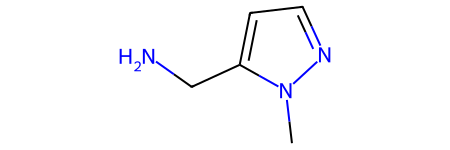

In [7]:
smi = 'Cn1nccc1CN'
Chem.MolFromSmiles(smi)
# mol = dm.to_mol(smi, sanitize=False, kekulize=False)
# mol

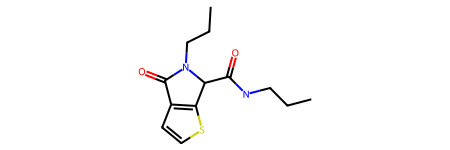

In [8]:
amine_smi = 'CCCN'
oxo_acid_smi = 'O=Cc1sccc1C(=O)O'
# oxo_acid_smi = 'O=Cc1c(C(=O)O)[nH]c2ccccc12'
nc_smi = '[C-]#[N+]CCC'

ugi_4c_3c_oxo_acid_rxn(amine_smi, oxo_acid_smi, nc_smi)


### virtual lib

In [9]:
# import pandas as pd
import itertools
from concurrent.futures import ProcessPoolExecutor, as_completed
from tqdm import tqdm

# Load the data
df_amine = pd.read_csv('./data/bak/amine.csv')
df_keto_acid = pd.read_csv('./data/bak/keto_acid.csv')
df_nc = pd.read_csv('./data/bak/nc.csv')

# Function to process each combination
def process_combination(combination):
    amine_r, keto_acid_r, nc_r = combination
    amine_smi = amine_r[-1]['smi']
    amine_id = amine_r[-1]['amine_id']
    keto_acid_smi = keto_acid_r[-1]['smi']
    keto_acid_id = keto_acid_r[-1]['keto_acid_id']
    nc_smi = nc_r[-1]['smi']
    nc_id = nc_r[-1]['nc_id']
    ugi_product_smi = Chem.MolToSmiles(ugi_4c_3c_oxo_acid_rxn(amine_smi, keto_acid_smi, nc_smi))
    ugi_product_id = f"{amine_id}-{keto_acid_id}-{nc_id}"
    return ugi_product_id, ugi_product_smi

# Generate all combinations
combinations = list(itertools.product(df_amine.iterrows(), df_keto_acid.iterrows(), df_nc.iterrows()))


In [10]:

# Process combinations in parallel and track progress with tqdm
results = []
with ProcessPoolExecutor(max_workers=10) as executor:
    # Submit all the tasks and get future objects
    futures = [executor.submit(process_combination, combo) for combo in combinations]

    # As each future completes, update the progress bar
    for future in tqdm(as_completed(futures), total=len(futures), desc="Processing"):
        results.append(future.result())

# Convert results to DataFrame
df_ugi_product = pd.DataFrame(results, columns=['ugi_product_id', 'ugi_product_smi'])

Processing: 100%|██████████| 8998368/8998368 [14:40<00:00, 10225.29it/s]


In [11]:
combinations[0][0][-1]['smi']

'NCC(=O)N1CCCC1'

In [17]:
df_ugi_product.to_csv('./ugi_oxo_acid_product.csv', index=False)

In [18]:
df_ugi_product.head()

,ugi_product_id,ugi_product_smi
0,amine1-keto_acid1-nc6,O=C(CN1C(=O)c2ccccc2C1(C(=O)Nc1ccc2ccccc2c1)c1...
1,amine1-keto_acid2-nc2,CCOc1cc(OCC)c(C2(C(=O)NC(C)(C)CC(C)(C)C)CCC(=O...
2,amine1-keto_acid1-nc5,O=C(CN1C(=O)c2ccccc2C1(C(=O)NCC(c1ccccc1)c1ccc...
3,amine1-keto_acid2-nc1,CCOc1cc(OCC)c(C2(C(=O)Nc3ccc(OC)cc3)CCC(=O)N2C...
4,amine1-keto_acid2-nc9,CCOc1cc(OCC)c(C2(C(=O)NC3=CCCCC3)CCC(=O)N2CC(=...


In [14]:
df_ugi_product = df_ugi_product["ugi_product_smi"].apply(lambda x: Chem.MolToSmiles(x))

ArgumentError: Python argument types in
    rdkit.Chem.rdmolfiles.MolToSmiles(str)
did not match C++ signature:
    MolToSmiles(RDKit::ROMol mol, bool isomericSmiles=True, bool kekuleSmiles=False, int rootedAtAtom=-1, bool canonical=True, bool allBondsExplicit=False, bool allHsExplicit=False, bool doRandom=False)
    MolToSmiles(RDKit::ROMol mol, RDKit::SmilesWriteParams params)

In [ ]:
df_ugi_product.head()
df_ugi_product.to_csv('./ugi_oxo_acid.csv', index=False)

### exp

In [ ]:
df_exp_reagent = pd.read_csv('./exp_reagents.csv')
df_exp_reagent

FileNotFoundError: [Errno 2] No such file or directory: './exp_reagents.csv'

In [ ]:
df_exp_nc = df_exp_reagent[df_exp_reagent['id'].str.contains('nc')].reset_index(drop=True)
df_exp_oa = df_exp_reagent[df_exp_reagent['id'].str.contains('oa')].reset_index(drop=True)
df_exp_am = df_exp_reagent[df_exp_reagent['id'].str.contains('am')].reset_index(drop=True)

# import itertools

# combinations = list(itertools.product(df_exp_am.iterrows(), df_exp_oa.iterrows(), df_exp_nc.iterrows()))

df_exp_ugi_prod = pd.DataFrame()  # Set an empty index explicitly
for i_nc, r_nc in df_exp_nc.iterrows():
    for i_oa, r_oa in df_exp_oa.iterrows():
        for i_am, r_am in df_exp_am.iterrows():
            try:
                ugi_prod_smi = ugi_4c_3c_oxo_acid_rxn(r_am['smiles'], r_oa['smiles'], r_nc['smiles'])
            except:
                print(f"Error in {r_am['id']}-{r_oa['id']}-{r_nc['id']}")
            ugi_prod_id = f"{r_am['id']}-{r_oa['id']}-{r_nc['id']}"
            df_exp_ugi_prod = df_exp_ugi_prod._append({'id': ugi_prod_id, 'smiles': ugi_prod_smi}, ignore_index=True)
df_exp_ugi_prod

NameError: name 'df_exp_reagent' is not defined

In [ ]:
df_exp_ugi_prod.to_csv('./exp_ugi_prod.csv', index=False)

## Fandi's work
https://onlinelibrary.wiley.com/doi/10.1002/anie.202105584

In [ ]:

def ugi_4c_rxn(ald_smi, nc_smi, acid_smi='C=CC(=O)O'):

    ald_mol = Chem.MolFromSmiles(ald_smi)
    acid_mol = Chem.MolFromSmiles(acid_smi)
    nc_mol = Chem.MolFromSmiles(nc_smi)
    nh3_mol = Chem.MolFromSmiles('N')

    ugi_4c_smarts = "[N;X3;H3:1].[C;H1:2](=[O:3]).[C:4](=[O:5])(-[O]).[C-:6]#[N+:7]>>[C:4](=[O:5])[N:1][C:2][C+0:6](=[O:3])[N+0:7]"
    ugi_4c_rxn = AllChem.ReactionFromSmarts(ugi_4c_smarts)

    products = ugi_4c_rxn.RunReactants((nh3_mol, ald_mol, acid_mol, nc_mol))

    return Chem.MolToSmiles(products[0][0], kekuleSmiles=True)
    # return products

In [ ]:
ald_smi = 'CC(=O)'
nc_smi = '[C-]#[N+]C'

ugi_prod_smi = ugi_4c_rxn(ald_smi, nc_smi)

Chem.MolFromSmiles(ugi_prod_smi)

In [ ]:


# df = pd.read_csv("./data/nc_ugi4c_Fandi.csv")
df = pd.read_csv("./data/aldehyde_ugi4c_Fandi.csv")
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in df["smiles"]], molsPerRow=5, subImgSize=(300, 300), legends=df["mol_id"].tolist())
# for smi in df["smiles"]:
#     mol = Chem.MolFromSmiles(smi)
#     img = Draw.MolToImage(mol)
#     display(img)


In [ ]:
df_ald_fandi = pd.read_csv('./data/aldehyde_ugi4c_Fandi.csv')

df_nc_fandi = pd.read_csv('./data/nc_ugi4c_Fandi.csv')

df_ugi_prod_fandi = pd.DataFrame(columns=['mol_id', 'smiles'])

for i_ald, r_ald in df_ald_fandi.iterrows():
    for i_nc, r_nc in df_nc_fandi.iterrows():
        if (i_ald < 6 and i_nc < 4) or (6 <= i_ald < 12 and 8 <= i_nc < 12) or (12 <= i_ald < 18 and 4 <= i_nc < 8) or (18 <= i_ald < 24 and 12 <= i_nc < 16):
            try:
                ugi_prod_smi = ugi_4c_rxn(r_ald['smiles'], r_nc['smiles'])
            except:
                print(r_ald['smiles'], r_nc['smiles'])
            df_ugi_prod_fandi = pd.concat([df_ugi_prod_fandi, pd.DataFrame({'mol_id': f"{r_ald['mol_id']}-{r_nc['mol_id']}", 'smiles': ugi_prod_smi}, index=[0])], ignore_index=True)

df_ugi_prod_fandi.to_csv('./data/ugi_prod_fandi.csv', index=False)

In [ ]:
df_ugi_prod_fandi = pd.read_csv("./data/ugi_prod_fandi.csv")
ugi_prod_fandi_smiles_list =  [Chem.MolToSmiles(Chem.MolFromSmiles(smi), kekuleSmiles=True) for smi in df_ugi_prod_fandi["smiles"]]
# Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in df_ugi_prod_fandi["smiles"]], molsPerRow=5, subImgSize=(300, 300), legends=df_ugi_prod_fandi["mol_id"].tolist())

In [ ]:
print(ugi_prod_fandi_smiles_list)

## Test

In [ ]:
# ald_smi = 'CC(=O)'
# nc_smi = '[C-]#[N+]C'

# ugi_prod_smi = ugi_4c_rxn(ald_smi, nc_smi)

# Chem.MolFromSmiles(ugi_prod_smi)

In [20]:
df_ugi_product.head()
df_ugi_product.to_csv('./ugi_4c3c_oxo_acid.csv', index=False)